In [1]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falli

In [2]:
import lightgbm
lightgbm.__version__

'3.3.2'

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44544 (\N{HANGUL SYLLABLE GEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


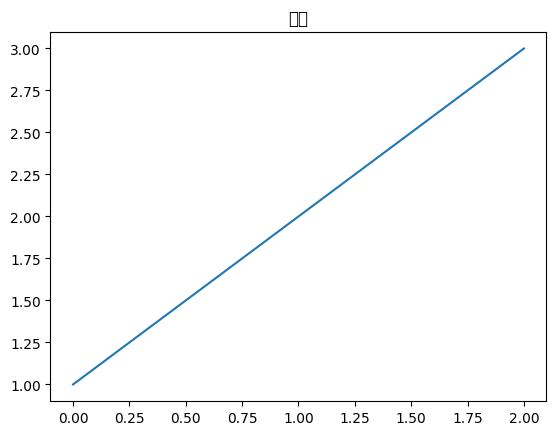

In [3]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞ÏôÄ Ìï®Íªò ÌïúÎ≤àÎßå Ïã§Ìñâ

plt.plot([1, 2, 3])
plt.title("ÌïúÍ∏Ä")
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)


# 1. data Î∂àÎü¨Ïò§Í∏∞

In [4]:
bike_df = pd.read_csv('/content/drive/MyDrive/·ÑÜ·Ö•·ÜØ·Ñê·Öµ·Ñè·Ö¢·Ü∑·Ñë·Ö•·Ñâ·Ö≥/data/bike_sharing/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32

In [5]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Î¨∏ÏûêÏó¥ÏùÑ datetime ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÍ≤Ω.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime ÌÉÄÏûÖÏóêÏÑú ÎÖÑ, Ïõî, Ïùº, ÏãúÍ∞Ñ Ï∂îÏ∂ú
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2

# 2. data Í∞ÄÍ≥µ & EDA

In [7]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis = 1, inplace = True)

bike_df.head(3)

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   

   count  year  month  day  hour  
0     16  2011      1    1     0  
1     40  2011      1    1     1  
2     32  2011      1    1     2

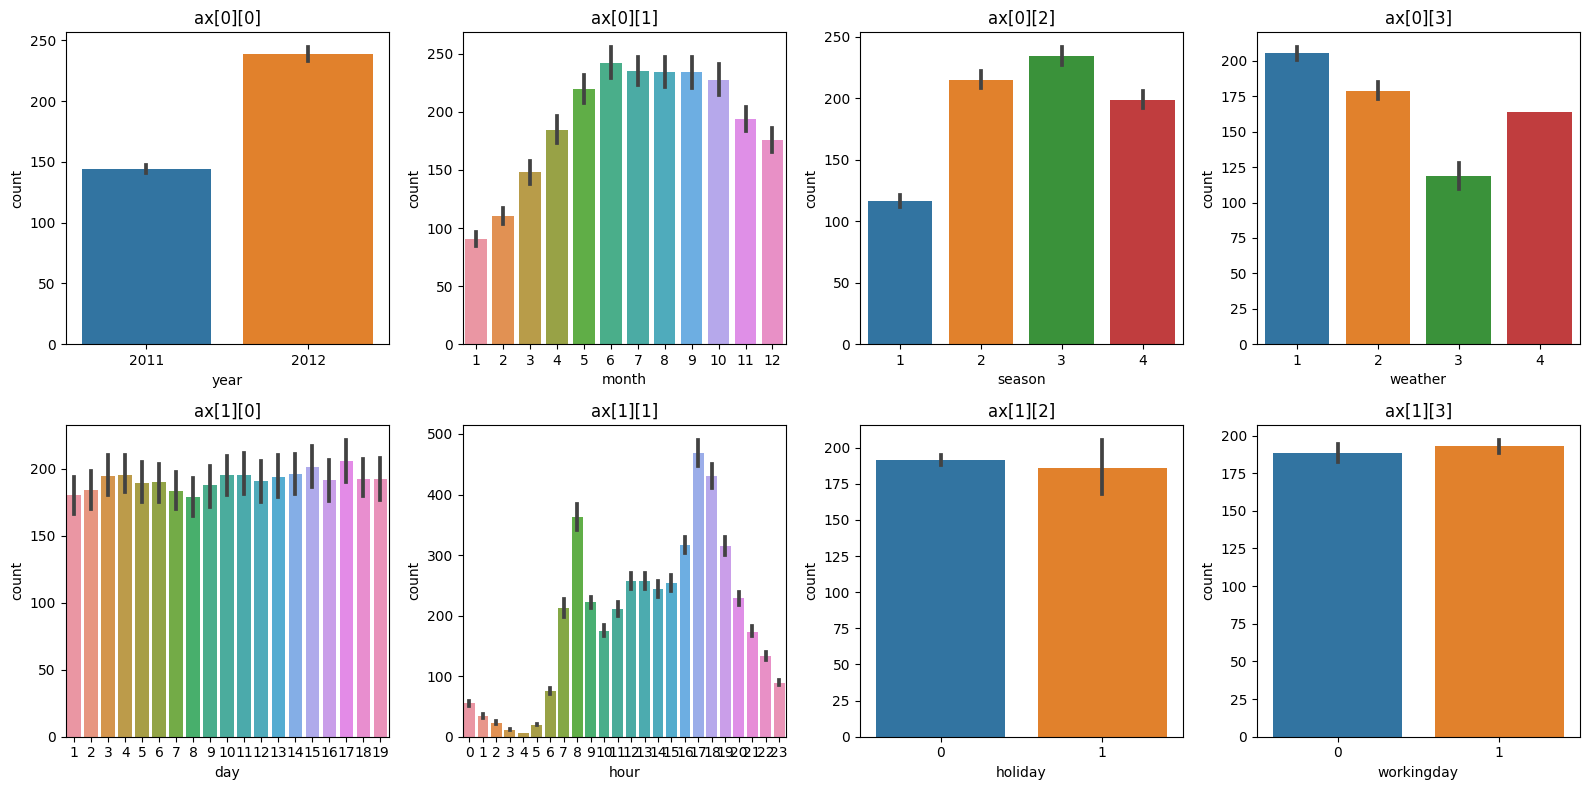

In [8]:
# ÏãúÍ∞ÅÌôî Í∑∏ÎûòÌîÑ Î∞òÎ≥µÎ¨∏ Ïç®ÏÑú ÌïúÎ≤àÏóê Í∑∏Î¶¨Í∏∞
cat_features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']

fig, ax = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
for i, feature in enumerate(cat_features):
    row = int(i/4) # Î™´(0, 1)
    col = i%4 # ÎÇòÎ®∏ÏßÄ 0, 1, 2, 3

    sns.barplot(x = feature, y = 'count', data = bike_df, ax = ax[row][col])
    ax[row][col].set_title(f'ax[{row}][{col}]')

plt.tight_layout()
plt.show()

# 3. ÌèâÍ∞Ä ÏßÄÌëú Íµ¨ÌòÑ
- RMSLE : scikit-learn ÏóêÏÑúÎäî ÎØ∏Ï†úÍ≥µ
- RMSLE Ìï®Ïàò ÎßåÎì¶

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# logÍ∞í Î≥ÄÌôò Ïãú NaN Îì±Ïùò Ïù¥ÏäàÎ°ú log()ÏÇ¨Ïö© ÏïàÌï®, ÎåÄÏã†log1p() ÏÇ¨Ïö©
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# mean_squared_error() Ïù¥Ïö©Ìï¥ÏÑú RMSE Í≥ÑÏÇ∞
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

# MAE, RMSE, RMSLE Î•º Î™®Îëê Í≥ÑÏÇ∞
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE Îäî scikit learnÏùò mean_absolute_error() Î°ú Í≥ÑÏÇ∞
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

# 4. Î°úÍ∑∏Î≥ÄÌôò, ÌîºÏ≤ò Ïù∏ÏΩîÎî©, Î™®Îç∏ ÌïôÏäµ

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Ï†ïÍ∑úÌôî, ÌëúÏ§ÄÌôî ÏûëÏóÖ ÏÑ†ÏßÑÌñâ Ìï¥Ï§òÏïº Ìï®
y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 12), (3266, 12), (7620,), (3266,))

In [11]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
evaluate_regr(y_test, pred)

RMSLE: 1.176, RMSE: 143.308, MAE: 107.367


- 368 ~ 374p : Î™®Îç∏ ÏÑ±Îä• ÏóÖÍ∑∏Î†àÏù¥Îìú ÎÇ¥Ïö©

# 5. Î™®Îç∏ ÌèâÍ∞Ä

In [12]:
def get_top_error_data(y_test, pred, n_tops = 5):
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['prediction_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['prediction_count'])

    print(result_df.sort_values('diff', ascending =False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  prediction_count   diff
537          835             213.0  622.0
2860         809             194.0  615.0
1259         784             179.0  605.0
2098         731             142.0  589.0
887          968             406.0  562.0


<Axes: >

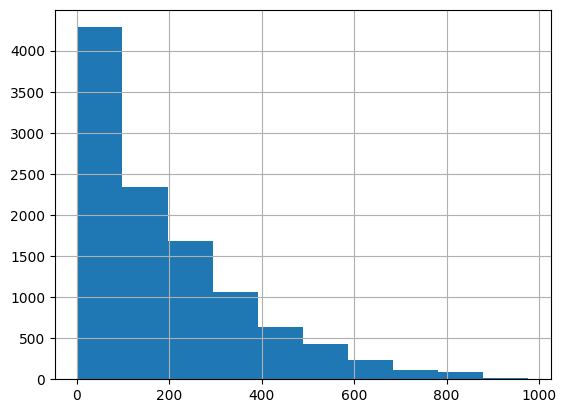

In [13]:
y_target.hist()

# 6. Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Î°úÍ∑∏Î≥ÄÌôò

<Axes: >

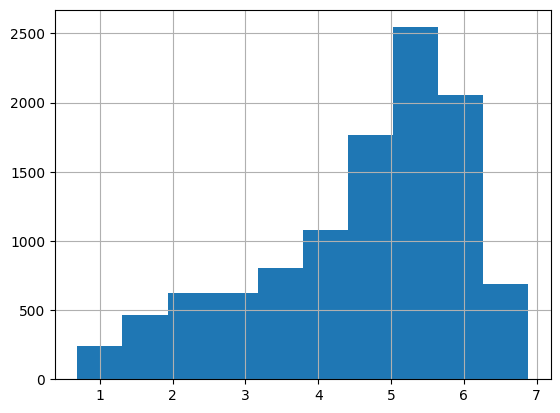

In [14]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

# 7. Î™®Îç∏ Ïû¨Íµ¨Ï∂ï

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Îã§Ïãú ÌïôÏäµ & ÏòàÏ∏°!

y_target_log = np.log1p(y_target)
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 11)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò ÌÉÄÍπÉÍ∞íÏùÑ ÏõêÎûò Ïä§ÏºÄÏùºÎ°ú Î≥ÄÌôò
y_test_exp = np.expm1(y_test)

# ÏòàÏ∏°Í∞íÎèÑ Ïä§ÏºÄÏùº ÏõêÏÉÅÎ≥µÍµ¨
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.027, RMSE: 161.615, MAE: 108.537


- Í∞Å ÌîºÏ≥êÏùò ÌöåÍ∑Ä Í≥ÑÏàò Í∞í ÏãúÍ∞ÅÌôî

<Axes: >

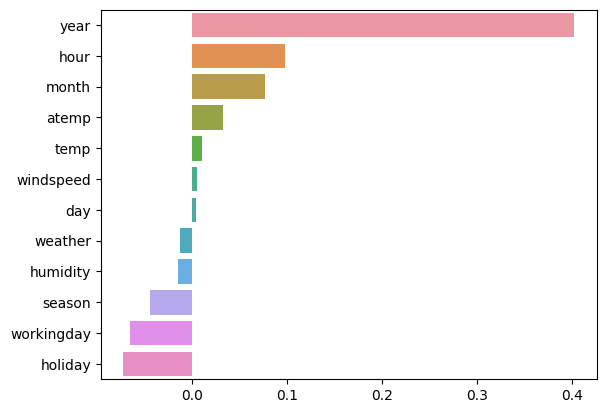

In [16]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

# 8. Î≥ÄÏàò Ïù∏ÏΩîÎî© Î≥ÄÌôò

In [17]:
# 'year', month', 'day', hour'Îì±Ïùò ÌîºÏ≤òÎì§ÏùÑ One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

# 9. Î™®Îç∏ Ïû¨Íµ¨Ï∂ï 2
- Í∏∞Ï°¥ Ïù∏ÏΩîÎî© Î≥ÄÌôò
- 3Í∞ú Î™®Îç∏ ÎπÑÍµê Î∂ÑÏÑù

In [19]:
# ÌÖåÏä§Ìä∏/ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size = 0.3, random_state = 0)

# Î≥¥Í¥ÄÌïòÎ©¥ Ï¢ãÏùÄ Î©îÏÑúÎìúüî•
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):  #ÏßÄÏàòÎ≥ÄÌôò
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:  # ÏßÄÏàòÎ≥ÄÌôò ÏöîÏ≤≠
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

# model Î≥ÑÎ°ú ÌèâÍ∞Ä ÏàòÌñâ
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<Axes: >

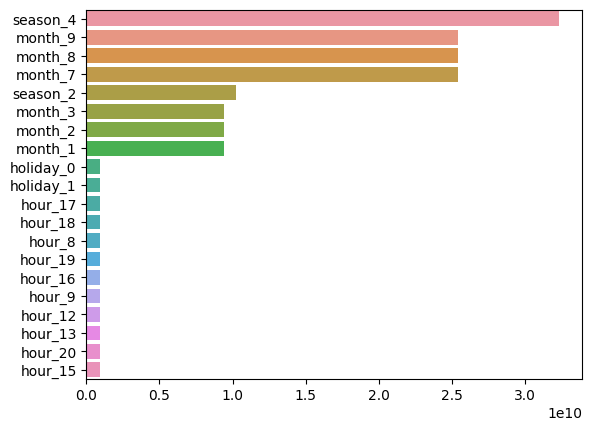

In [20]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

# 10. Î™®Îç∏ Ïû¨Íµ¨Ï∂ï 3

In [41]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, GBM, XGBoost, LightGBM model Î≥ÑÎ°ú ÌèâÍ∞Ä ÏàòÌñâ
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoostÏùò Í≤ΩÏö∞ DataFrameÏù¥ ÏûÖÎ†• Îê† Í≤ΩÏö∞ Î≤ÑÏ†ÑÏóê Îî∞Îùº Ïò§Î•ò Î∞úÏÉù Í∞ÄÎä•. ndarrayÎ°ú Î≥ÄÌôò.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.202, MAE: 31.175
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.332, MAE: 32.747
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
